# Getting the data ready

In [2]:
# Imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error
from prettytable import PrettyTable

#### Import the dataset

In [3]:
games = pd.read_csv("xbox_video_games.csv", header=0, encoding="unicode_escape")
games.head()

,Pos,Game,Year,Genre,Publisher,North America,Europe,Japan,Rest of World,Global
0,1,Grand Theft Auto V,2014.0,Action,Rockstar Games,4.70,3.25,0.01,0.76,8.72
1,2,Call of Duty: Black Ops 3,2015.0,Shooter,Activision,4.63,2.04,0.02,0.68,7.37
2,3,Call of Duty: WWII,2017.0,Shooter,Activision,3.75,1.91,0.00,0.57,6.23
3,4,Red Dead Redemption 2,2018.0,Action-Adventure,Rockstar Games,3.76,1.47,0.00,0.54,5.77
4,5,MineCraft,2014.0,Misc,Microsoft Studios,3.23,1.71,0.00,0.49,5.43


#### Remove null values & format column names

In [5]:
# Remove null values
games.dropna(inplace=True)

# Format column names
games.rename(inplace=True, columns=str.lower)
games.rename(inplace=True, columns={"north america": "na_sales", "europe": "eu_sales", "japan": "jp_sales", "rest of world": "other_sales"})
games = games[['genre', 'publisher', 'na_sales', 'eu_sales', 'jp_sales','other_sales']]

# Remove outlier
games = games.drop(games[games['na_sales'] == 4.7].index)
games = games.drop(games[games['na_sales'] == 4.63].index)
games = games.drop(games[games['eu_sales'] == 3.25].index)

games.head()

,genre,publisher,na_sales,eu_sales,jp_sales,other_sales
2,Shooter,Activision,3.75,1.91,0.00,0.57
3,Action-Adventure,Rockstar Games,3.76,1.47,0.00,0.54
4,Misc,Microsoft Studios,3.23,1.71,0.00,0.49
5,Shooter,Activision,3.25,1.49,0.01,0.48
6,Shooter,Electronic Arts,3.37,1.26,0.02,0.48


#### Encode categorical data

In [4]:
from sklearn.preprocessing import LabelEncoder

le_genre = LabelEncoder()
le_publisher = LabelEncoder()

games['genre_n'] = le_genre.fit_transform(games['genre'])
games['publisher_n'] = le_publisher.fit_transform(games['publisher'])

games = games.drop(['genre', 'publisher'], axis='columns')

games.head()

,na_sales,eu_sales,jp_sales,other_sales,genre_n,publisher_n
2,3.75,1.91,0.00,0.57,11,5
3,3.76,1.47,0.00,0.54,1,69
4,3.23,1.71,0.00,0.49,5,50
5,3.25,1.49,0.01,0.48,11,5
6,3.37,1.26,0.02,0.48,11,24


In [5]:
X = games.drop(columns=['na_sales', 'eu_sales', 'jp_sales', 'other_sales'])
y_n = games['na_sales']
y_e = games['eu_sales']
y_j = games['jp_sales']
y_o = games['other_sales']

#### Split into train and test data

In [6]:
X_train_n, X_test_n, y_train_n, y_test_n = train_test_split(X, y_n, test_size=0.2, random_state=42)
X_train_e, X_test_e, y_train_e, y_test_e = train_test_split(X, y_e, test_size=0.2, random_state=42)
X_train_j, X_test_j, y_train_j, y_test_j = train_test_split(X, y_j, test_size=0.2, random_state=42)
X_train_o, X_test_o, y_train_o, y_test_o = train_test_split(X, y_o, test_size=0.2, random_state=42)

#### Scale data

In [7]:


scaler = StandardScaler()

X_train_scaled_n = scaler.fit_transform(X_train_n)
X_test_scaled_n = scaler.transform(X_test_n)

X_train_scaled_e = scaler.fit_transform(X_train_e)
X_test_scaled_e = scaler.transform(X_test_e)

X_train_scaled_j = scaler.fit_transform(X_train_j)
X_test_scaled_j = scaler.transform(X_test_j)

X_train_scaled_o = scaler.fit_transform(X_train_o)
X_test_scaled_o = scaler.transform(X_test_o)

# Prediction Models

#### Create models

In [8]:
rf = RandomForestRegressor(n_estimators=100, max_features=2, random_state=42, criterion="squared_error")
gb = GradientBoostingRegressor(n_estimators=1000, min_samples_split=2 , 
                           max_features=2, random_state=42)

#### Train & test models

In [9]:
# ------- Random Forest -------
rf.fit(X_train_scaled_n, y_train_n)
y_rfpred_n = rf.predict(X_test_scaled_n)
y_rftpred_n = rf.predict(X_train_scaled_n)

rf.fit(X_train_scaled_e, y_train_e)
y_rfpred_e = rf.predict(X_test_scaled_e)
y_rftpred_e = rf.predict(X_train_scaled_e)

rf.fit(X_train_scaled_j, y_train_j)
y_rfpred_j = rf.predict(X_test_scaled_j)
y_rftpred_j = rf.predict(X_train_scaled_j)

rf.fit(X_train_scaled_o, y_train_o)
y_rfpred_o = rf.predict(X_test_scaled_o)
y_rftpred_o = rf.predict(X_train_scaled_o)

# ------- Gradient Boosting -------

gb.fit(X_train_scaled_n, y_train_n)
y_gbpred_n = gb.predict(X_test_scaled_n)

gb.fit(X_train_scaled_e, y_train_e)
y_gbpred_e = gb.predict(X_test_scaled_e)

gb.fit(X_train_scaled_j, y_train_j)
y_gbpred_j = gb.predict(X_test_scaled_j)

gb.fit(X_train_scaled_o, y_train_o)
y_gbpred_o = gb.predict(X_test_scaled_o)

# Visualise Accuracy

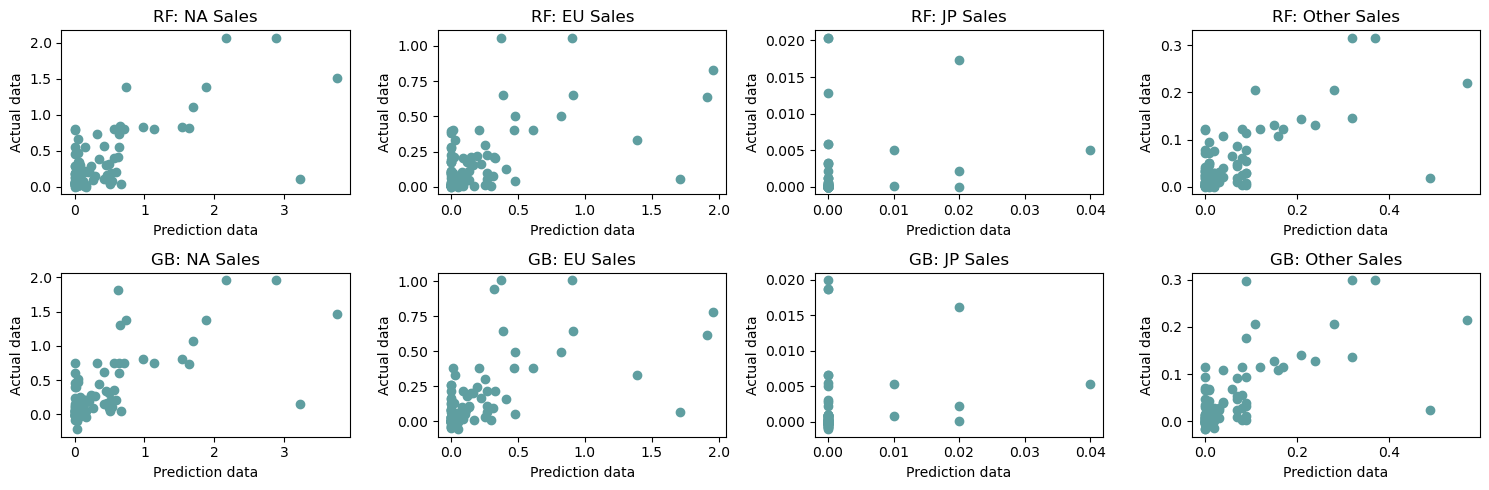

+-------------------------------------------------------------------------------+
|                                 Random Forest                                 |
+---------+----------------------+-----------------------+----------------------+
| Country |          R2          |          MSE          |      MSE_Train       |
+---------+----------------------+-----------------------+----------------------+
|    NA   |  0.4944552459201903  |  0.22603794536169022  | 0.12078148976079345  |
|    EU   | 0.33923079341434903  |  0.09156387911888586  | 0.049399199185728944 |
|    JP   | -0.11039630515170784 | 3.141460382970129e-05 | 0.049399199185728944 |
|  Other  |  0.4763977491810245  |  0.005263411407418947 | 0.049399199185728944 |
+---------+----------------------+-----------------------+----------------------+
+--------------------------------------------------------+
|                   Gradient Boosting                    |
+---------+----------------------+-----------------------+
| C

In [10]:
# Create subplots with 2 row and 3 columns
plt.figure(figsize=(15, 5))

color="cadetblue"

# ------- Random Forest -------

plt.subplot(2, 4, 1)
plt.scatter(y_test_n, y_rfpred_n, color="cadetblue", label="Prediction Actual vs Prediction data")
plt.title("RF: NA Sales")
plt.xlabel("Prediction data")
plt.ylabel("Actual data")

plt.subplot(2, 4, 2)
plt.scatter(y_test_e, y_rfpred_e, color="cadetblue", label="Prediction Actual vs Prediction data")
plt.title("RF: EU Sales")
plt.xlabel("Prediction data")
plt.ylabel("Actual data")

plt.subplot(2, 4, 3)
plt.scatter(y_test_j, y_rfpred_j, color="cadetblue", label="Prediction Actual vs Prediction data")
plt.title("RF: JP Sales")
plt.xlabel("Prediction data")
plt.ylabel("Actual data")

plt.subplot(2, 4, 4)
plt.scatter(y_test_o, y_rfpred_o, color="cadetblue", label="Prediction Actual vs Prediction data")
plt.title("RF: Other Sales")
plt.xlabel("Prediction data")
plt.ylabel("Actual data")

# ------- Gradient Boosting -------

plt.subplot(2, 4, 5)
plt.scatter(y_test_n, y_gbpred_n, color="cadetblue", label="Prediction Actual vs Prediction data")
plt.title("GB: NA Sales")
plt.xlabel("Prediction data")
plt.ylabel("Actual data")

plt.subplot(2, 4, 6)
plt.scatter(y_test_e, y_gbpred_e, color="cadetblue", label="Prediction Actual vs Prediction data")
plt.title("GB: EU Sales")
plt.xlabel("Prediction data")
plt.ylabel("Actual data")

plt.subplot(2, 4, 7)
plt.scatter(y_test_j, y_gbpred_j, color="cadetblue", label="Prediction Actual vs Prediction data")
plt.title("GB: JP Sales")
plt.xlabel("Prediction data")
plt.ylabel("Actual data")

plt.subplot(2, 4, 8)
plt.scatter(y_test_o, y_gbpred_o, color="cadetblue", label="Prediction Actual vs Prediction data")
plt.title("GB: Other Sales")
plt.xlabel("Prediction data")
plt.ylabel("Actual data")

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plots
plt.show()


# ------ Random Forest Scores ------

# R2
rfn = metrics.r2_score(y_test_n, y_rfpred_n)
rfe = metrics.r2_score(y_test_e, y_rfpred_e)
rfj = metrics.r2_score(y_test_j, y_rfpred_j)
rfo = metrics.r2_score(y_test_o, y_rfpred_o)

# MSE - TEST
rfmse_n = mean_squared_error(y_test_n, y_rfpred_n, squared=True)
rfmse_e = mean_squared_error(y_test_e, y_rfpred_e, squared=True)
rfmse_j = mean_squared_error(y_test_j, y_rfpred_j, squared=True)
rfmse_o = mean_squared_error(y_test_o, y_rfpred_o, squared=True)

# MSE - TRAIN
rftmse_n = mean_squared_error(y_train_n, y_rftpred_n, squared=True)
rftmse_e = mean_squared_error(y_train_e, y_rftpred_e, squared=True)
rftmse_j = mean_squared_error(y_train_j, y_rftpred_j, squared=True)
rftmse_o = mean_squared_error(y_train_o, y_rftpred_o, squared=True)


# ------ Gradient Boosting Scores ------

# R2
gbn = metrics.r2_score(y_test_n, y_gbpred_n)
gbe = metrics.r2_score(y_test_e, y_gbpred_e)
gbj = metrics.r2_score(y_test_j, y_gbpred_j)
gbo = metrics.r2_score(y_test_o, y_gbpred_o)

# MSE
gbmse_n = mean_squared_error(y_test_n, y_gbpred_n, squared=True)
gbmse_e = mean_squared_error(y_test_e, y_gbpred_e, squared=True)
gbmse_j = mean_squared_error(y_test_j, y_gbpred_j, squared=True)
gbmse_o = mean_squared_error(y_test_o, y_gbpred_o, squared=True)


table_fields = ['Country', 'R2', 'MSE', 'MSE_Train']
table_fields1 = ['Country', 'R2', 'MSE']

rf_table = PrettyTable(table_fields)
rf_table.padding_width = 1
rf_table.title = 'Random Forest'
rf_table.add_row(['NA', rfn, rfmse_n, rftmse_n])
rf_table.add_row(['EU', rfe, rfmse_e, rftmse_e])
rf_table.add_row(['JP', rfj, rfmse_j, rftmse_e])
rf_table.add_row(['Other', rfo, rfmse_o, rftmse_e])

gb_table = PrettyTable(table_fields1)
gb_table.padding_width = 1
gb_table.title = 'Gradient Boosting'
gb_table.add_row(['NA', gbn, gbmse_n])
gb_table.add_row(['EU', gbe, gbmse_e])
gb_table.add_row(['JP', gbj, gbmse_j])
gb_table.add_row(['Other', gbo, gbmse_o])

print(rf_table)
print(gb_table)